In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

Using TensorFlow backend.


In [2]:
with open('data_batch_1', 'rb') as f:
    batch_1 = pickle.load(f, encoding='bytes')

In [3]:
images = np.zeros((10000, 32, 32, 3), dtype='uint8')

for idx, img in enumerate(batch_1[b'data']):
    images[idx, :, :, 0] = img[:1024].reshape((32, 32)) # Red
    images[idx, :, :, 1] = img[1024:2048].reshape((32, 32)) # Green
    images[idx, :, :, 2] = img[2048:].reshape((32, 32)) # Blue

In [4]:
images = images / 255.

In [5]:
input_layer = Input(shape=(32, 32, 3,))

In [6]:
hidden_encoding = Conv2D(
    32, # Number of filters in the weight matrix
    (3, 3), # Shape of the weight matrix
    activation='relu',
    padding='same', # Retaining dimensions between input and output
)(input_layer)

In [7]:
encoded = MaxPooling2D((2, 2))(hidden_encoding)

In [8]:
hidden_decoding = Conv2D(
    32, # Number of filters in the weight matrix
    (3, 3), # Shape of the weight matrix
    activation='relu',
    padding='same', # Retaining dimensions between input and output
)(encoded)

In [9]:
upsample_decoding = UpSampling2D((2, 2))(hidden_decoding)

In [10]:
decoded = Conv2D(
    3, # Number of filters in the weight matrix
    (3, 3), # Shape of the weight matrix
    activation='sigmoid',
    padding='same', # Retaining dimensions between input and output
)(upsample_decoding)

In [11]:
autoencoder = Model(input_layer, decoded)

In [12]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 3)         867       
Total params: 11,011
Trainable params: 11,011
Non-trainable params: 0
_________________________________________________________________


In [13]:
autoencoder.compile(loss='binary_crossentropy',
              optimizer='adadelta')

In [14]:
autoencoder.fit(images, images, epochs=20)

Epoch 1/20
10000/10000 [==============================] - 69s 7ms/step - loss: 0.5917
Epoch 2/20
10000/10000 [==============================] - 142s 14ms/step - loss: 0.5655
Epoch 3/20
10000/10000 [==============================] - 133s 13ms/step - loss: 0.5596
Epoch 4/20
10000/10000 [==============================] - 134s 13ms/step - loss: 0.5576
Epoch 5/20
10000/10000 [==============================] - 134s 13ms/step - loss: 0.5561
Epoch 6/20
10000/10000 [==============================] - 135s 13ms/step - loss: 0.5551
Epoch 7/20
10000/10000 [==============================] - 134s 13ms/step - loss: 0.5542
Epoch 8/20
10000/10000 [==============================] - 135s 13ms/step - loss: 0.5538
Epoch 9/20
10000/10000 [==============================] - 133s 13ms/step - loss: 0.5532
Epoch 10/20
10000/10000 [==============================] - 133s 13ms/step - loss: 0.5528
Epoch 11/20
10000/10000 [==============================] - 132s 13ms/step - loss: 0.5526
Epoch 12/20
10000/10000 [=======

In [15]:
encoder_output = Model(input_layer, encoded).predict(images[:5])

In [16]:
encoder_output = encoder_output.reshape((-1, 256, 32))

In [17]:
decoder_output = autoencoder.predict(images[:5])

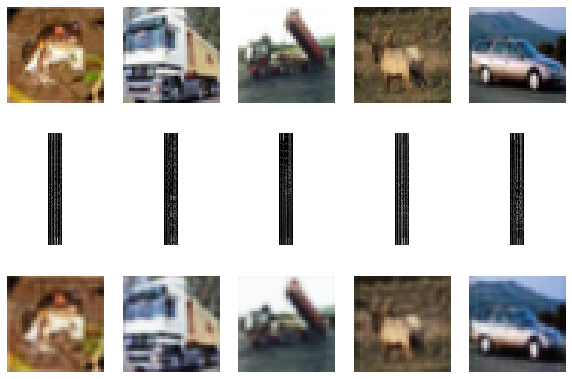

In [18]:
plt.figure(figsize=(10, 7))
for i in range(5):
    # Plot original images
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    
    # Plot encoder output
    plt.subplot(3, 5, i + 6)
    plt.imshow(encoder_output[i], cmap='gray')
    plt.axis('off')   
    
    # Plot decoder output
    plt.subplot(3, 5, i + 11)
    plt.imshow(decoder_output[i])
    plt.axis('off')        